In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = "AB_NYC_2019.csv"  
df = pd.read_csv(data)

In [66]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [69]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [70]:
df = df.dropna(subset=['name', 'host_name', 'last_review', 'reviews_per_month'])

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

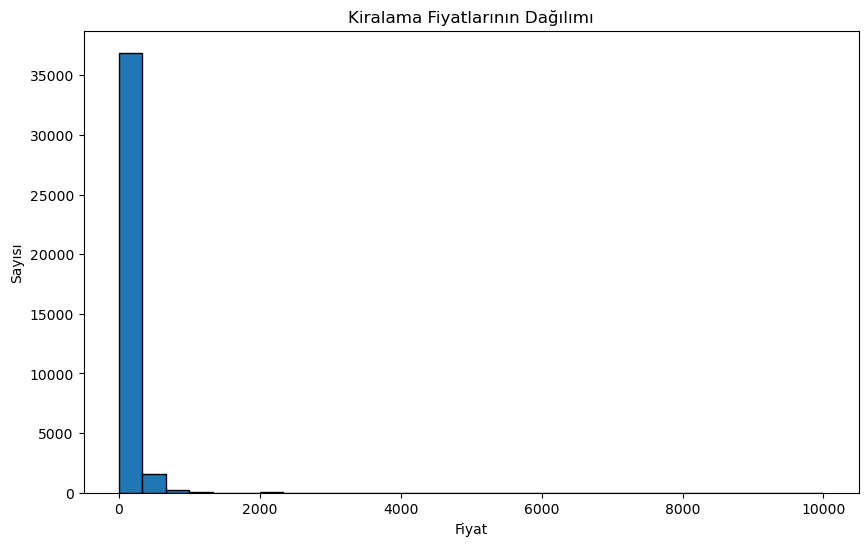

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('Fiyat')
plt.ylabel('Sayısı')
plt.title('Kiralama Fiyatlarının Dağılımı')
plt.show()

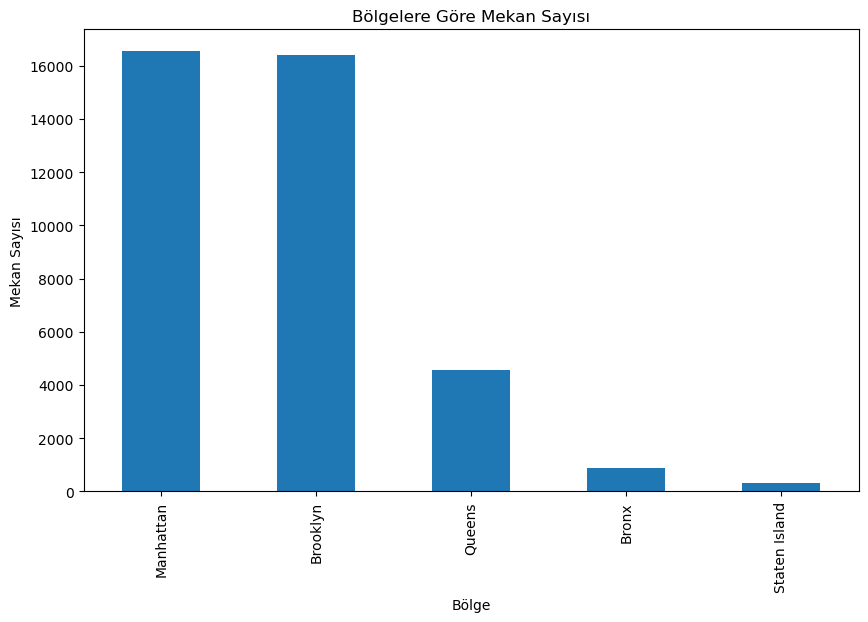

In [85]:
plt.figure(figsize=(10, 6))
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.xlabel('Bölge')
plt.ylabel('Mekan Sayısı')
plt.title('Bölgelere Göre Mekan Sayısı')
plt.show()


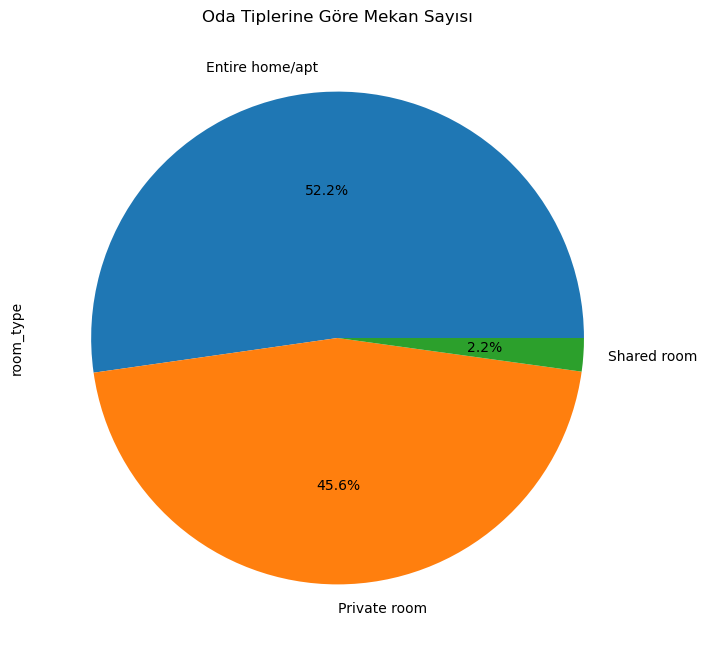

In [86]:
plt.figure(figsize=(8, 8))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Oda Tiplerine Göre Mekan Sayısı')
plt.show()

In [73]:
expensive_homes = df[df['price'] > 750]

num_expensive_homes = len(expensive_homes)

In [74]:
num_expensive_homes

278

In [75]:
df = df[df['price'] <= 1000]

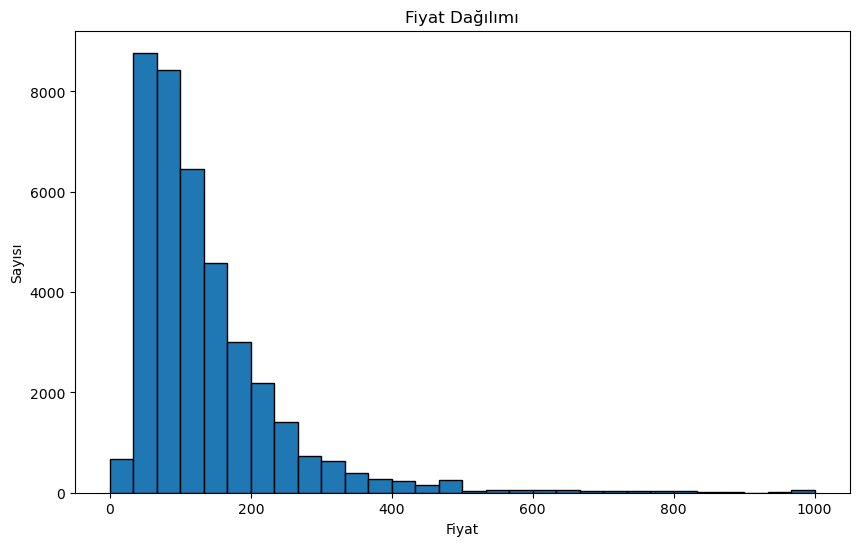

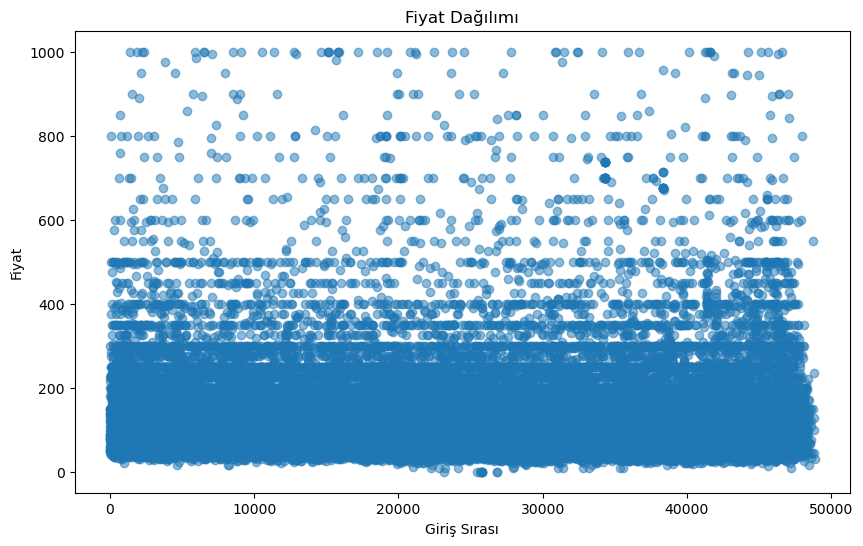

In [76]:

plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('Fiyat')
plt.ylabel('Sayısı')
plt.title('Fiyat Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['price'], alpha=0.5)
plt.xlabel('Giriş Sırası')
plt.ylabel('Fiyat')
plt.title('Fiyat Dağılımı')
plt.show()

In [77]:
neighbourhood_groups_unique = df['neighbourhood_group'].unique()
neighbourhood_group_counts = df['neighbourhood_group'].value_counts()
neighbourhood_group_table = pd.DataFrame({'neighbourhood_group': neighbourhood_groups_unique, 'count': neighbourhood_group_counts})
print("neighbourhood_group Sütunu Benzersiz Değerler Tablosu:")
print(neighbourhood_group_table)

neighbourhood_group Sütunu Benzersiz Değerler Tablosu:
              neighbourhood_group  count
Manhattan                Brooklyn  16541
Brooklyn                Manhattan  16416
Queens                     Queens   4568
Bronx               Staten Island    875
Staten Island               Bronx    314


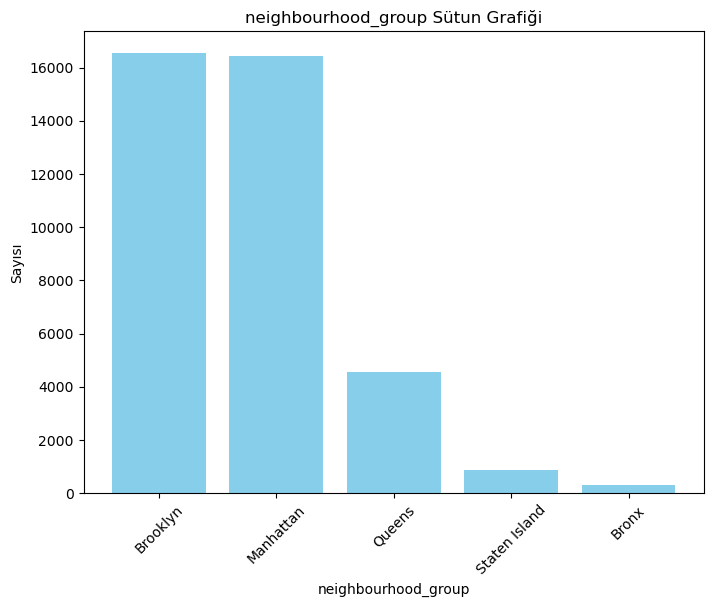

In [78]:
plt.figure(figsize=(8, 6))
plt.bar(neighbourhood_group_table['neighbourhood_group'], neighbourhood_group_table['count'], color='skyblue')
plt.xlabel('neighbourhood_group')
plt.ylabel('Sayısı')
plt.title('neighbourhood_group Sütun Grafiği')
plt.xticks(rotation=45)
plt.show()

In [79]:

neighbourhoods_unique = df['neighbourhood'].unique()
neighbourhood_counts = df['neighbourhood'].value_counts()
neighbourhood_table = pd.DataFrame({'neighbourhood': neighbourhoods_unique, 'count': neighbourhood_counts})
print("\nneighbourhood Sütunu Benzersiz Değerler Tablosu:")
print(neighbourhood_table)


neighbourhood Sütunu Benzersiz Değerler Tablosu:
                     neighbourhood  count
Williamsburg            Kensington   3161
Bedford-Stuyvesant         Midtown   3136
Harlem                Clinton Hill   2201
Bushwick               East Harlem   1941
Hell's Kitchen         Murray Hill   1526
...                            ...    ...
Lighthouse Hill          Olinville      2
New Dorp Beach           Rossville      2
Richmondtown          Breezy Point      1
Rossville              Willowbrook      1
Willowbrook         New Dorp Beach      1

[218 rows x 2 columns]


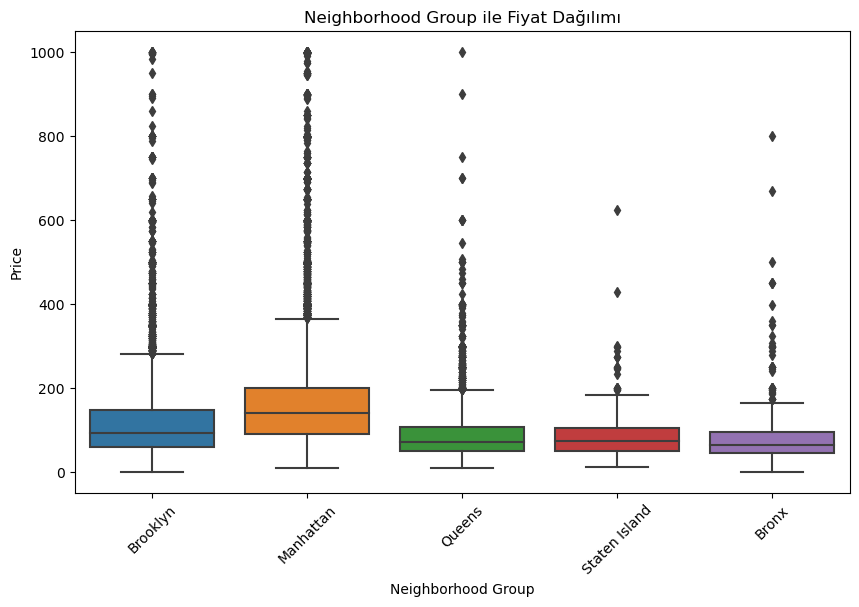

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.xlabel('Neighborhood Group')
plt.ylabel('Price')
plt.title('Neighborhood Group ile Fiyat Dağılımı')
plt.xticks(rotation=45)
plt.show()

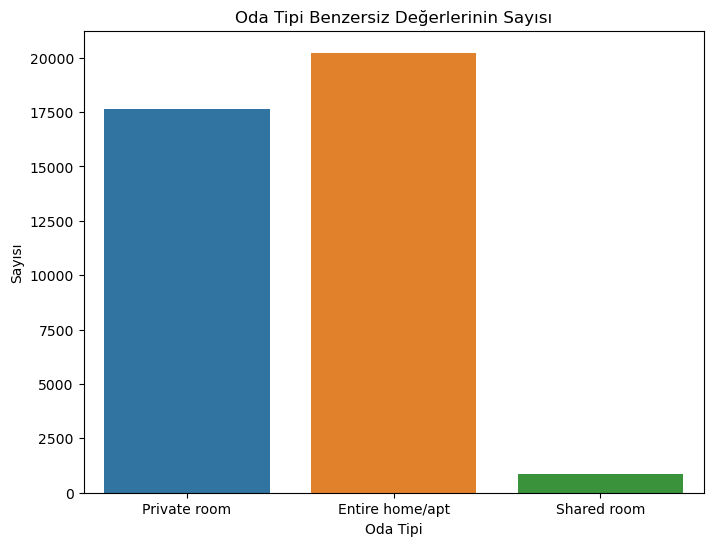

In [81]:

plt.figure(figsize=(8, 6))
sns.countplot(x='room_type', data=df)
plt.xlabel('Oda Tipi')
plt.ylabel('Sayısı')
plt.title('Oda Tipi Benzersiz Değerlerinin Sayısı')
plt.show()

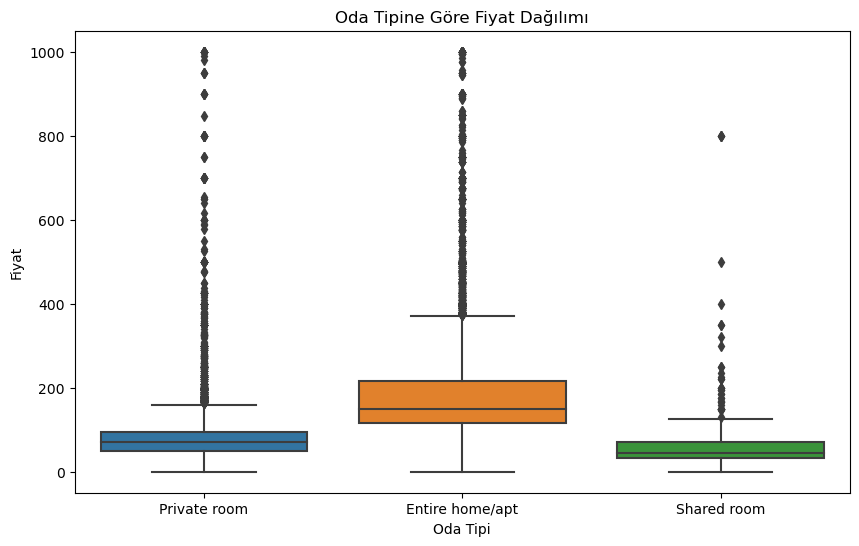

In [82]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_type', y='price', data=df)
plt.xlabel('Oda Tipi')
plt.ylabel('Fiyat')
plt.title('Oda Tipine Göre Fiyat Dağılımı')
plt.show()

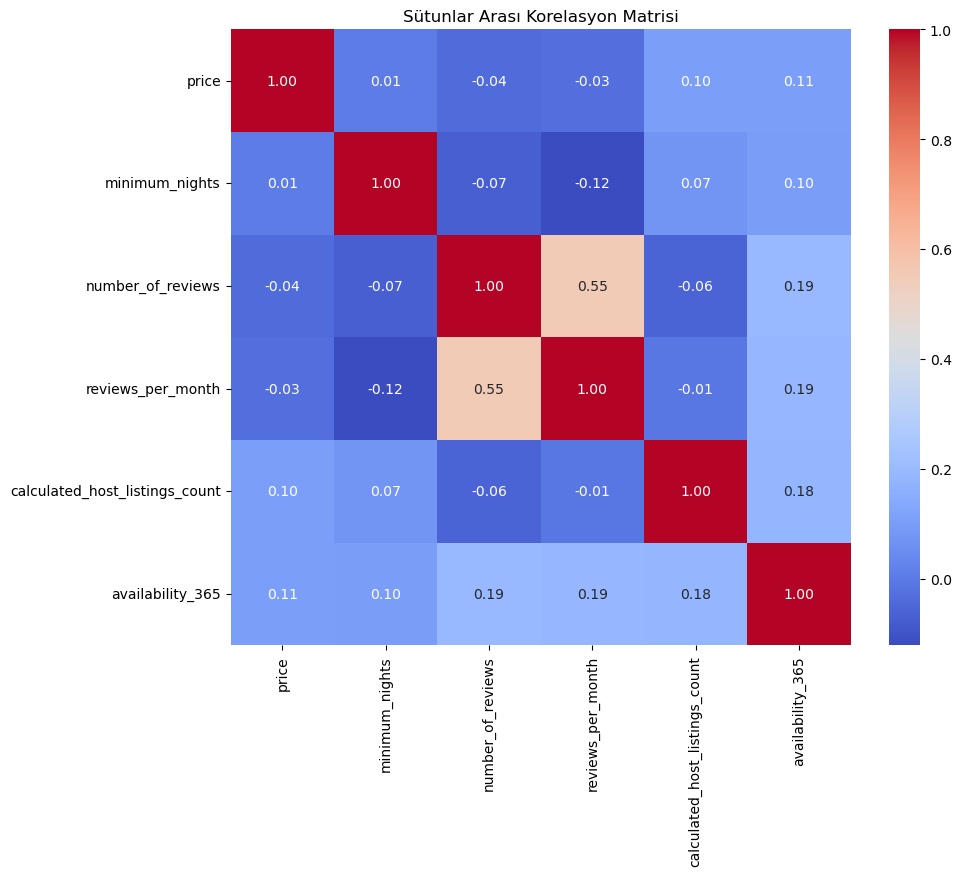

In [84]:
selected_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
df_corr = df[selected_columns]

correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sütunlar Arası Korelasyon Matrisi')
plt.show()